<a href="https://colab.research.google.com/github/davestroud/Deep_Learning/blob/master/neural_nets_keras/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Artificial Neural Networks with Keras

### <center>Biological Neuron</center>
![](images/neuron.png)

## “Cells that fire together, wire together”

> When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a **dense** layer.

*the connection weight between two neurons tends to increase when they fire simultaneously.* ~ Hebb's rule

## Backpropagation Algorithm

> The **backpropagation** algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

#### Let’s run through the algorithm in a bit more detail:

> It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

> Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

> Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

> Then it computes how much each output connection contributed to the error. This is done analytically by applying the **chain rule** (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

> The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

> Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

### <center>Typical regression MLP architecture</center>
![](images/mlp_regression.png)

### <center>Typical classification MLP architecture</center>
![](images/mlp_classification.png)

# Building an Image Classifier Using the Sequential API

> Load the Fashion MNIST dataset. This is a drop-in replacement of the MNIST dataset.

> The dataset has 70,000 greyscale images of 28 x 28 pixels each, with 10 classes.

> This dataset is significantly more challenging than the MNIST dataset. For example, a simple linear model reaches around 92% accuracy on MNIST, but only around 83% on Fashion MNIST.


### <center>Samples from Fashion MNIST dataset</center>
![](images/FMNIST_sample.png)

In [26]:
# Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [25]:
# We are using tensorflow version 2.0
tf.__version__

'2.0.0'

In [21]:
keras.__version__

'2.2.4-tf'

In [24]:
# Load the datset. Note: train and test set are already split for you.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
# Every image is represented as a 28 x 28 array rather than a 1D array of size 784
# Pixel intensities are represented as integers from 0 to 255, rather than floats
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [27]:
# List of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
# Example of the first image in the training set:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

> Here is a classification MLP with two hidden layers:

In [29]:
# code that builds the neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:

> The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

> Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].

> Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes the equation below: 

 <center > <math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <msub>
      <mi>h</mi>
      <mrow>
        <mi mathvariant="bold">W</mi>
        <mo>,</mo>
        <mi mathvariant="bold">b</mi>
      </mrow>
    </msub>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mi>&#x3D5;</mi>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mi mathvariant="bold">W</mi>
      <mo>+</mo>
      <mi mathvariant="bold">b</mi>
      <mo>)</mo>
    </mrow>
  </mrow>
</math> <center>

> Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

> Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers

In [40]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [41]:
model.get_layer('dense_3') is hidden1

True

In [43]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06714182,  0.05718173,  0.02944557, ..., -0.03960896,
         0.04642007,  0.01297732],
       [ 0.01088481,  0.0525094 ,  0.06691198, ...,  0.05987774,
        -0.03304314,  0.04375952],
       [-0.01145871, -0.00836556,  0.01767467, ..., -0.04773249,
         0.05978806,  0.04867551],
       ...,
       [-0.05361543,  0.02882023,  0.00626164, ...,  0.05766775,
         0.02289047, -0.06843333],
       [ 0.05815023, -0.01688362, -0.06829529, ..., -0.06501156,
         0.02588434,  0.03054632],
       [ 0.06866685,  0.03556019, -0.02386855, ..., -0.0715955 ,
        -0.04356875,  0.04895236]], dtype=float32)

In [44]:
weights.shape

(784, 300)

In [46]:
biases.shape

(300,)

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

> **sparse_categorical_crossentropy** loss is used because we have sparse labels. (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.

> **sgd** means that we will traning the model using simple Stocastic Gradient Descent.

> **accuracy** is a usefull measurement, since this is a classifier.

### Training and Evaluating the Model

> Now that the model is ready to be trained, we simply call its fit() method:

In [48]:
history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.7068 - accuracy: 0.7661 - val_loss: 0.4944 - val_accuracy: 0.8374
Epoch 2/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4876 - accuracy: 0.8307 - val_loss: 0.4534 - val_accuracy: 0.8434
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4427 - accuracy: 0.8454 - val_loss: 0.4252 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4173 - accuracy: 0.8532 - val_loss: 0.4113 - val_accuracy: 0.8552
Epoch 5/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3969 - accuracy: 0.8605 - val_loss: 0.3887 - val_accuracy: 0.8646
Epoch 6/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3802 - accuracy: 0.8656 - val_loss: 0.3689 - val_accuracy: 0.8730
Epoch 7/30
55000/55000 [===========================

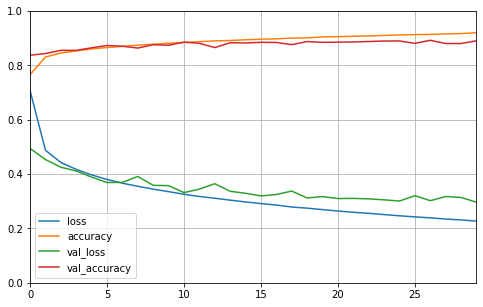

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

> *the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch.*

In [52]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[62.3334749591412, 0.8506]